In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
pd.options.display.max_columns=None
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
for i in df:
    print(f"for column {i},\n{df[i].value_counts()}\n")

for column customerID,
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

for column gender,
Male      3555
Female    3488
Name: gender, dtype: int64

for column SeniorCitizen,
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

for column Partner,
No     3641
Yes    3402
Name: Partner, dtype: int64

for column Dependents,
No     4933
Yes    2110
Name: Dependents, dtype: int64

for column tenure,
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

for column PhoneService,
Yes    6361
No      682
Name: PhoneService, dtype: int64

for column MultipleLines,
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

for column InternetService,
Fiber optic    3096
DSL      

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [7]:
ind = np.where(df['TotalCharges']==' ')
ind

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],
       dtype=int64),)

In [8]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)
df['TotalCharges'].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [9]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df=df.rename(columns= str.lower)
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
df=df.drop('customerid',axis=1)
df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [13]:
cont_cols=['tenure','monthlycharges','totalcharges']
cat_cols=[]
for i in df:
    if i in cont_cols:
        continue
    else:
        cat_cols.append(i)
cat_cols

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

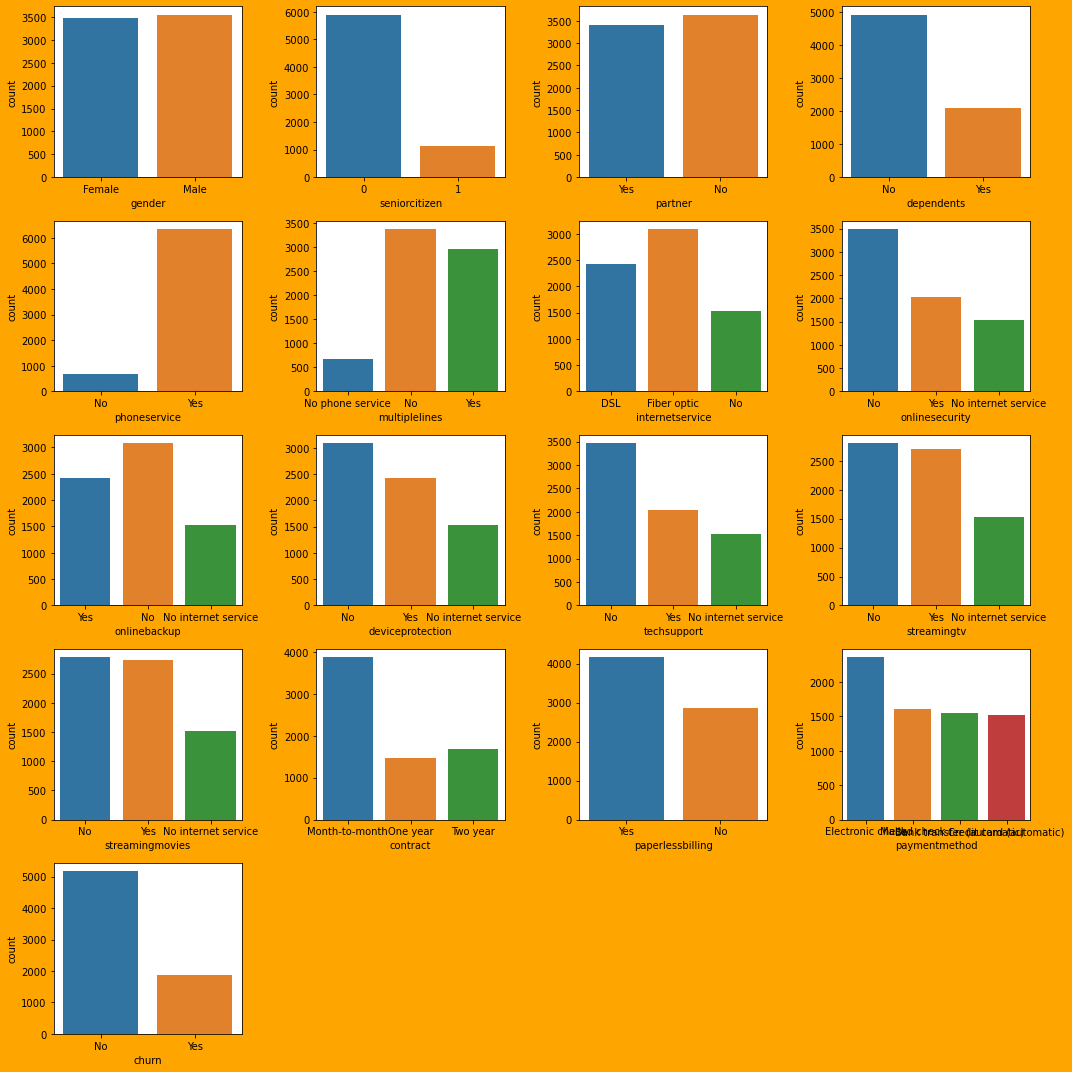

In [14]:
plotno=1
plt.figure(figsize=(15,15),facecolor='orange')
for i in cat_cols:
    plt.subplot(5,4,plotno)
    sns.countplot(df[i])
    plt.xlabel(i)
    plotno+=1
plt.tight_layout()

In [15]:
df['totalcharges']=df['totalcharges'].astype(float)
mn=df['totalcharges'].mean()
mn=round(mn,2)
df['totalcharges']= df['totalcharges'].fillna(mn)
df.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [16]:
df['totalcharges'].value_counts()

2283.30    12
20.20      11
19.75       9
19.90       8
20.05       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: totalcharges, Length: 6530, dtype: int64

In [17]:
# imputation done.

In [18]:
# encoding is required..

In [19]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [20]:
for i in cat_cols:
    df[i]=le.fit_transform(df[[i]])

In [21]:
df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [22]:
df.describe()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300440,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [23]:
# it seems that totalcharges column might have some outliers...
# let's quantify this.

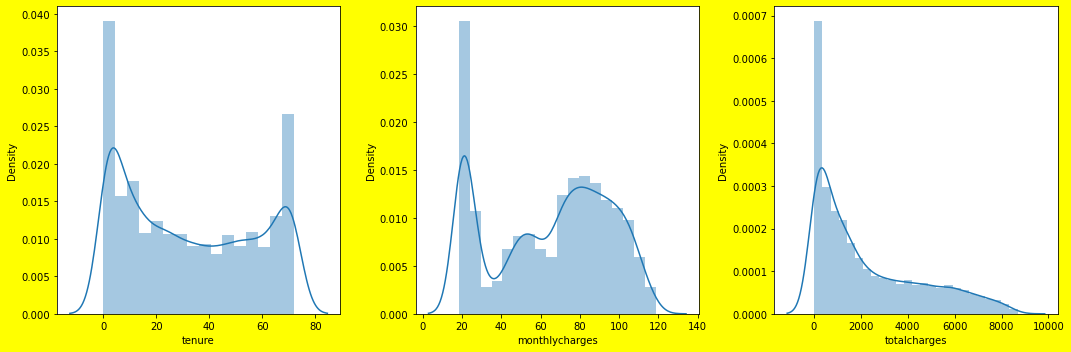

In [24]:
plotno=1
plt.figure(figsize=(15,5),facecolor='yellow')
for i in cont_cols:
    plt.subplot(1,3,plotno)
    sns.distplot(df[i])
    plt.xlabel(i)
    plotno+=1
plt.tight_layout()

In [25]:
# there is large skewness in all of these continuous columns..

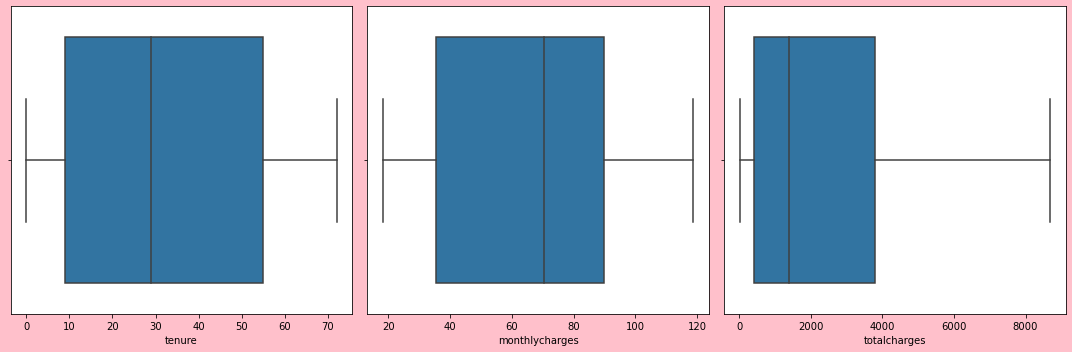

In [26]:
plotno=1
plt.figure(figsize=(15,5),facecolor='pink')
for i in cont_cols:
    plt.subplot(1,3,plotno)
    sns.boxplot(df[i])
    plt.xlabel(i)
    plotno+=1
plt.tight_layout()

In [27]:
# no outliers present..

In [28]:
# let's check skewness..

In [29]:
df.skew()

gender             -0.019031
seniorcitizen       1.833633
partner             0.067922
dependents          0.875199
tenure              0.239540
phoneservice       -2.727153
multiplelines       0.118719
internetservice     0.205423
onlinesecurity      0.416985
onlinebackup        0.182930
deviceprotection    0.186847
techsupport         0.402365
streamingtv         0.028486
streamingmovies     0.014657
contract            0.630959
paperlessbilling   -0.375396
paymentmethod      -0.170129
monthlycharges     -0.220524
totalcharges        0.962394
churn               1.063031
dtype: float64

In [30]:
# totalcharges feature has the large skewness.. so, needs transformation for this..

In [31]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [32]:
for i in cont_cols:
    df[i]=pt.fit_transform(df[[i]])
df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,0,1,0,-1.644343,0,1,0,0,2,0,0,0,0,0,1,2,-1.158541,-1.810588,0
1,1,0,0,0,0.297205,1,0,0,2,0,2,0,0,0,1,0,3,-0.239492,0.253313,0
2,1,0,0,0,-1.495444,1,0,0,2,2,0,0,0,0,0,1,3,-0.342665,-1.387269,1
3,1,0,0,0,0.646327,0,1,0,2,0,2,2,0,0,1,0,0,-0.731079,0.232253,0
4,0,0,0,0,-1.495444,1,0,1,0,0,0,0,0,0,0,1,2,0.213545,-1.250118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.078084,1,2,0,2,0,2,2,2,2,1,1,3,0.671510,0.295688,0
7039,0,0,1,1,1.342198,1,2,1,0,2,2,0,2,2,1,1,1,1.260981,1.567096,0
7040,0,0,1,1,-0.725121,0,1,0,2,0,0,0,0,0,0,1,2,-1.167241,-0.859899,0
7041,1,1,1,0,-1.265130,1,2,1,0,0,0,0,0,0,0,1,3,0.334312,-0.922968,1


In [33]:
df.skew()

gender             -0.019031
seniorcitizen       1.833633
partner             0.067922
dependents          0.875199
tenure             -0.243325
phoneservice       -2.727153
multiplelines       0.118719
internetservice     0.205423
onlinesecurity      0.416985
onlinebackup        0.182930
deviceprotection    0.186847
techsupport         0.402365
streamingtv         0.028486
streamingmovies     0.014657
contract            0.630959
paperlessbilling   -0.375396
paymentmethod      -0.170129
monthlycharges     -0.259035
totalcharges       -0.144899
churn               1.063031
dtype: float64

In [34]:
# so,skewness removed..

In [35]:
df.corr()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.002867,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014537,-0.002691,-0.008612
seniorcitizen,-0.001874,1.000000,0.016479,-0.211185,0.020578,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220251,0.105478,0.150889
partner,-0.001808,0.016479,1.000000,0.452676,0.378976,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.095325,0.344618,-0.150448
dependents,0.010517,-0.211185,0.452676,1.000000,0.163686,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.114781,0.087831,-0.164221
tenure,0.002867,0.020578,0.378976,0.163686,1.000000,0.007399,0.343074,-0.028518,0.316484,0.360776,0.365648,0.315483,0.289914,0.297282,0.638415,0.008525,-0.370644,0.244338,0.897364,-0.369980
phoneservice,-0.006488,0.008576,0.017706,-0.001762,0.007399,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.243642,0.084371,0.011942
multiplelines,-0.006739,0.146185,0.142410,-0.024991,0.343074,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.432007,0.458682,0.038037
internetservice,-0.000863,-0.032310,0.000891,0.044590,-0.028518,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.334598,-0.207654,-0.047291
onlinesecurity,-0.015017,-0.128221,0.150828,0.152166,0.316484,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.055763,0.242515,-0.289309
onlinebackup,-0.012057,-0.013632,0.153130,0.091015,0.360776,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.116013,0.344209,-0.195525


<AxesSubplot:>

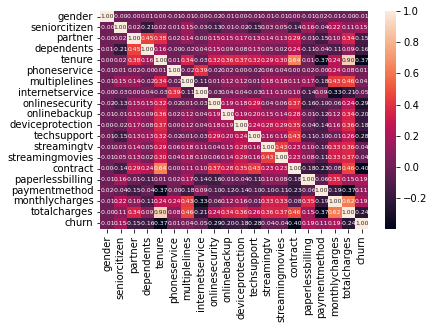

In [36]:
sns.heatmap(df.corr(),annot=True,annot_kws={'size':6},fmt='.2f')

In [37]:
# totalcharges has correlation 0.90 with tenure and 0.62 with monthly charges..

In [38]:
# let's check vif values..

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
def vif_check (df):
    x=df.drop('churn',axis=1)
    vif=pd.DataFrame()
    vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [41]:
vif_check(df)

          vif          features
0    1.945317            gender
1    1.339259     seniorcitizen
2    2.771489           partner
3    1.971137        dependents
4   28.798662            tenure
5    9.208220      phoneservice
6    2.440853     multiplelines
7    4.433943   internetservice
8    2.260014    onlinesecurity
9    2.368238      onlinebackup
10   2.582588  deviceprotection
11   2.410913       techsupport
12   3.132896       streamingtv
13   3.133893   streamingmovies
14   3.951523          contract
15   2.602286  paperlessbilling
16   3.451580     paymentmethod
17   8.472512    monthlycharges
18  40.843141      totalcharges


In [42]:
# so, as confirmed from df.corr and vif values, totalcharges will be deleted..

In [43]:
df=df.drop('totalcharges',axis=1)
vif_check(df)

         vif          features
0   1.945186            gender
1   1.339259     seniorcitizen
2   2.770638           partner
3   1.969013        dependents
4   2.379488            tenure
5   9.200502      phoneservice
6   2.432128     multiplelines
7   4.168259   internetservice
8   2.245073    onlinesecurity
9   2.355095      onlinebackup
10  2.567425  deviceprotection
11  2.394804       techsupport
12  3.131937       streamingtv
13  3.133493   streamingmovies
14  3.826396          contract
15  2.601081  paperlessbilling
16  3.445502     paymentmethod
17  2.228739    monthlycharges


In [44]:
df=df.drop('phoneservice',axis=1)
vif_check(df)

         vif          features
0   1.881758            gender
1   1.335118     seniorcitizen
2   2.726999           partner
3   1.963192        dependents
4   2.221897            tenure
5   2.417211     multiplelines
6   2.895025   internetservice
7   2.169766    onlinesecurity
8   2.322947      onlinebackup
9   2.560093  deviceprotection
10  2.356921       techsupport
11  3.129469       streamingtv
12  3.132150   streamingmovies
13  3.733950          contract
14  2.449364  paperlessbilling
15  3.167465     paymentmethod
16  1.967247    monthlycharges


In [45]:
# hence, multicollinearity removed..

In [46]:
# let's check best features by selectkbest

In [47]:
from sklearn.feature_selection import SelectKBest,f_classif

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [49]:
cont_cols.remove('totalcharges')
cont_cols

['tenure', 'monthlycharges']

In [50]:
for i in cont_cols:
    df[i]=scaler.fit_transform(df[[i]])

In [51]:
x=df.drop('churn',axis=1)
y=df['churn']
bestt=SelectKBest(score_func=f_classif,k=12)
select=bestt.fit(x,y)
df_bf=pd.DataFrame({'scores':select.scores_,'features':x.columns})
df_bf=df_bf.sort_values(by='scores', ascending=False)
df_bf

,scores,features
13,1315.088872,contract
4,1116.662888,tenure
7,643.162019,onlinesecurity
10,610.610024,techsupport
8,279.877370,onlinebackup
16,278.213598,monthlycharges
14,268.985218,paperlessbilling
9,230.744618,deviceprotection
3,195.149314,dependents
1,164.041424,seniorcitizen


In [52]:
selected_cols=['contract','tenure','onlinesecurity','techsupport','onlinebackup','monthlycharges','paperlessbilling','deviceprotection','dependents','seniorcitizen','partner','paymentmethod','churn']

In [53]:
df2=pd.DataFrame()
for i in selected_cols:
    df2[i]=df[i]
df2

,contract,tenure,onlinesecurity,techsupport,onlinebackup,monthlycharges,paperlessbilling,deviceprotection,dependents,seniorcitizen,partner,paymentmethod,churn
0,0,-1.644343,0,0,2,-1.158541,1,0,0,0,1,2,0
1,1,0.297205,2,0,0,-0.239492,0,2,0,0,0,3,0
2,0,-1.495444,2,0,2,-0.342665,1,0,0,0,0,3,1
3,1,0.646327,2,2,0,-0.731079,0,2,0,0,0,0,0
4,0,-1.495444,0,0,0,0.213545,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,-0.078084,2,2,0,0.671510,1,2,1,0,1,3,0
7039,1,1.342198,0,0,2,1.260981,1,2,1,0,1,1,0
7040,0,-0.725121,2,0,0,-1.167241,1,0,1,0,1,2,0
7041,0,-1.265130,0,0,0,0.334312,1,0,0,1,1,3,1


In [54]:
df2['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [55]:
# it's an imbalancing problem..

In [56]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(0.85)

In [57]:
x=df2.drop('churn',axis=1)
y=df2['churn']

In [58]:
x2,y2= sm.fit_resample(x,y)
print(x2)
print(y2)

      contract    tenure  onlinesecurity  techsupport  onlinebackup  \
0            0 -1.644343               0            0             2   
1            1  0.297205               2            0             0   
2            0 -1.495444               2            0             2   
3            1  0.646327               2            2             0   
4            0 -1.495444               0            0             0   
...        ...       ...             ...          ...           ...   
9566         0 -1.306887               0            0             0   
9567         1  0.815097               2            0             2   
9568         0  0.898206               2            0             2   
9569         0 -0.775782               2            0             0   
9570         0 -0.154346               2            2             0   

      monthlycharges  paperlessbilling  deviceprotection  dependents  \
0          -1.158541                 1                 0           0   
1  

In [59]:
#now, let's move towards model development..

In [60]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,plot_roc_curve,auc

In [61]:
def algo_class_check (x,y,algo):
    max_acc=0
    max_i=0
    for i in range(100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = i)
        algo.fit(x_train,y_train)
        y_pred = algo.predict(x_test)
        acc= accuracy_score(y_test,y_pred)
        if acc> max_acc:
            max_acc=acc
            max_i = i
            i+=1
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = max_i)
    algo.fit(x_train,y_train)
    y_pred = algo.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    cvs=cross_val_score(algo,x_train,y_train,cv=7,scoring='accuracy')
    ac=cvs.mean()
    print(f'''for algo {algo}, the maximum accuracy is {max_acc} ,\n classification report is : \n {classification_report(y_test,y_pred)} ,
    \n roc_auc_score is : {roc_auc_score(y_test,y_pred)} \n roc curve is :{plot_roc_curve(algo,x,y)} \n at random_state{max_i} \n and cross validation score is {ac}''') 
 

In [62]:
lc=LogisticRegression()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

for algo LogisticRegression(), the maximum accuracy is 0.7831174258253238 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1284
           1       0.75      0.80      0.77      1109

    accuracy                           0.78      2393
   macro avg       0.78      0.78      0.78      2393
weighted avg       0.78      0.78      0.78      2393
 ,
    
 roc_auc_score is : 0.7840098289553891 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001B30A65CDF0> 
 at random_state99 
 and cross validation score is 0.7623294007376163


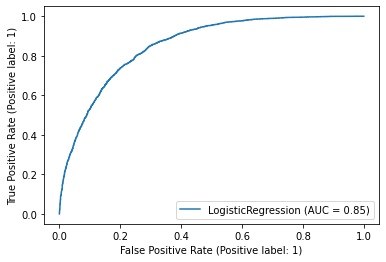

In [63]:
algo_class_check(x2,y2,lc)

for algo KNeighborsClassifier(), the maximum accuracy is 0.8065190137902215 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      1295
           1       0.75      0.87      0.80      1098

    accuracy                           0.81      2393
   macro avg       0.81      0.81      0.81      2393
weighted avg       0.81      0.81      0.81      2393
 ,
    
 roc_auc_score is : 0.8109831142618028 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001B31086E0A0> 
 at random_state51 
 and cross validation score is 0.7754240615087854


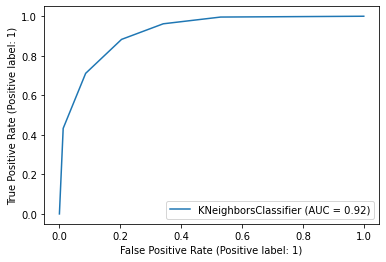

In [64]:
algo_class_check(x2,y2,knc)

for algo DecisionTreeClassifier(), the maximum accuracy is 0.7684914333472629 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1276
           1       0.75      0.75      0.75      1117

    accuracy                           0.77      2393
   macro avg       0.77      0.77      0.77      2393
weighted avg       0.77      0.77      0.77      2393
 ,
    
 roc_auc_score is : 0.7683600974396825 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001B310E0CFD0> 
 at random_state56 
 and cross validation score is 0.7340505735884425


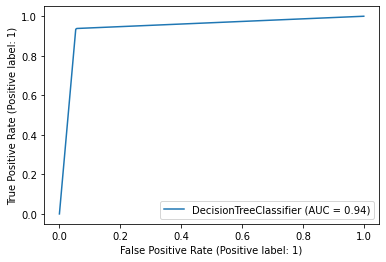

In [66]:
algo_class_check(x2,y2,dtc)

for algo AdaBoostClassifier(), the maximum accuracy is 0.7981613038027581 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.83      0.78      0.81      1284
           1       0.76      0.82      0.79      1109

    accuracy                           0.80      2393
   macro avg       0.80      0.80      0.80      2393
weighted avg       0.80      0.80      0.80      2393
 ,
    
 roc_auc_score is : 0.7993803881580611 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001B30A6A29D0> 
 at random_state99 
 and cross validation score is 0.7743085355665585


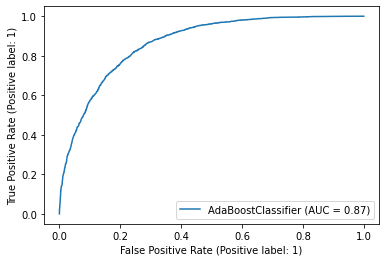

In [67]:
algo_class_check(x2,y2,abc)

for algo RandomForestClassifier(), the maximum accuracy is 0.8324279147513581 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1280
           1       0.81      0.81      0.81      1113

    accuracy                           0.83      2393
   macro avg       0.83      0.83      0.83      2393
weighted avg       0.83      0.83      0.83      2393
 ,
    
 roc_auc_score is : 0.8256994749550763 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001B3123B00D0> 
 at random_state24 
 and cross validation score is 0.8057888623999021


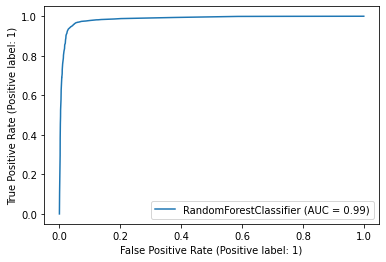

In [68]:
algo_class_check(x2,y2,rfc)

for algo SVC(), the maximum accuracy is 0.7927287923109068 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      1284
           1       0.75      0.83      0.79      1109

    accuracy                           0.79      2393
   macro avg       0.79      0.80      0.79      2393
weighted avg       0.80      0.79      0.79      2393
 ,
    
 roc_auc_score is : 0.7951169137248623 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001B312528580> 
 at random_state99 
 and cross validation score is 0.7708259809415136


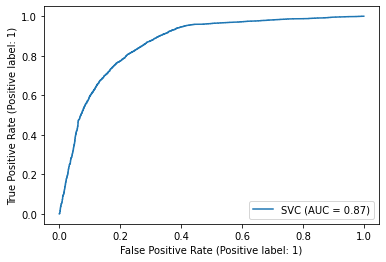

In [69]:
algo_class_check(x2,y2,svc)

In [70]:
# rfc has maximum accuracy as well as maximum cross_val_score, at random_state 24.. so, i m going to finalize this..

for RandomForestClassifier algo, the accuracy is 0.8286669452569996 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1280
           1       0.82      0.81      0.82      1113

    accuracy                           0.83      2393
   macro avg       0.83      0.83      0.83      2393
weighted avg       0.83      0.83      0.83      2393
 ,
    
 roc_auc_score is : 0.8277112112533692 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001B30A677B50> 
 and cross validation score is 0.8011949929023098


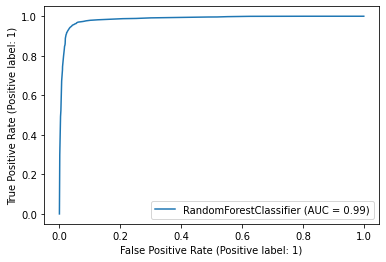

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.25,random_state = 24)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
acc= accuracy_score(y_test,y_pred)
cvs=cross_val_score(rfc,x_train,y_train,cv=7,scoring='accuracy')
ac=cvs.mean()
print(f'''for RandomForestClassifier algo, the accuracy is {acc} ,\n classification report is : \n {classification_report(y_test,y_pred)} ,
    \n roc_auc_score is : {roc_auc_score(y_test,y_pred)} \n roc curve is :{plot_roc_curve(rfc,x2,y2)} \n and cross validation score is {ac}''') 
 

In [73]:
# let's hypertune..

In [75]:
from sklearn.model_selection import GridSearchCV

In [77]:
params={'criterion':['gini','impurity','log_loss'],'max_depth':[7,9,10,11,12],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2],'max_features':['sqrt','log2'],'min_impurity_decrease':[0.0,0.1,0.2,0.3]}
grid = GridSearchCV(rfc,param_grid=params,cv=5,n_jobs=-1)
grid.fit(x2,y2)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'log2',
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

for RandomForestClassifier algo with hypertuned parameters, 
 the accuracy is 0.8232344337651484 ,
 
classification report is : 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1280
           1       0.79      0.84      0.81      1113

    accuracy                           0.82      2393
   macro avg       0.82      0.82      0.82      2393
weighted avg       0.82      0.82      0.82      2393
 ,
    

 roc_auc_score is : 0.8240983687106919 

 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001B312331D60> 
 and cross validation score is 0.8049547989214227


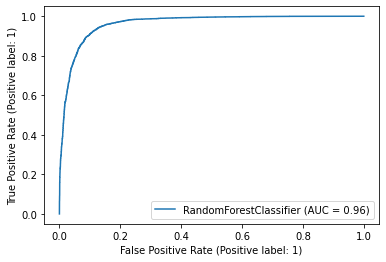

In [78]:
rfc1=RandomForestClassifier(criterion='gini',max_depth=12,min_samples_split=2,min_samples_leaf=1,max_features='log2',min_impurity_decrease=0.0)
rfc1.fit(x_train,y_train)
y_pred = rfc1.predict(x_test)
acc= accuracy_score(y_test,y_pred)
cvs=cross_val_score(rfc1,x_train,y_train,cv=7,scoring='accuracy')
ac=cvs.mean()
print(f'''for RandomForestClassifier algo with hypertuned parameters, \n the accuracy is {acc} ,\n \nclassification report is : \n {classification_report(y_test,y_pred)} ,
    \n\n roc_auc_score is : {roc_auc_score(y_test,y_pred)} \n\n roc curve is :{plot_roc_curve(rfc1,x2,y2)} \n and cross validation score is {ac}''') 
 

In [79]:
# there's a significant improvement..

In [80]:
# let's save this model..

In [81]:
import pickle
filename = 'Customer_Churn_Analysis_Evaluation_Project'
pickle.dump(rfc1,open(filename,'wb'))

In [ ]:
#CONCLUSION
# 1).HERE, I FOUND CLASS OF TARGET churn. IT HAS TWO CLASSES ONLY- Yes or No (i.e. 0 or 1).
# 2).IT'S A CLASSIFICATION PROBLEM WITH IMBALANCING PROBLEM OF TARGET VARIABLE.
# 3).FIRSTLY, I CHECKED ALL OF THE FEATURES AS IT HAS 21 FEATURES SO CLASSIFIED THEM
# INTO CONTINUOUS AND CATEGORICAL COLUMNS.
# 4).THERE WERE ' ' VALUES IN ONE OF THE COLUMN SO REPLACED THEM BY NAN VALUES AND HENCE, 
# IMPUTED THEM BY USING MEAN VALUES.
# 5).ALSO, USED LABEL ENCODER TO ENCODE CATEGORICAL COLUMNS.
# 6).ALSO, THERE WAS 1 ID COLUMN WHICH HAD NOTHING TO DO WITH MY MODEL. 
# SO, THAT WAS OF NO USE. HENCE, DELETED THAT FEATURE.
# 7).THEN CHECKED OUTLIERS AND FOUND THAT THERE WAS NO OUTLIERS IN CATEGORICAL COLUMNS.
# 8).THEN SKEWNESS REMOVED USING POWER TRANFORMER WITH YEO-JOHNSON METHOD
# 9).THEN DELETED SOME FEATURES BASED ON VIF VALUES AND HENCE, REMOVED MULTICOLLINEARITY.
# 10).THEN DONE SCALING ON THE X BY USING STANDARD SCALER.
# 11).THEN USED SMOTE WITH 0.85 AND HENCE, IMBALANCING OF TARGET VARIABLE WAS TACKLED.
# 12).I CHECKED MY MODEL WITH DIFFERENT ALGOS AND CAME TO THE CONCLUSION THAT
#  ACC. TO MY MODEL, RANDOM FOREST CLASSIFIER ALGO IS THE BEST ALGO.
# 13).THE ACCURACY IN TERMS OF ACCURACY_SCORE I GOT IS IN THE RANGE OF 83% ALONG WITH
# ROC_AUC_SCORE TO BE 99% AND 80% CROSS_VAL_SCORE.
# 14).ON CHECKING BY GRIDSEARCHCV, I FOUND THAT RFC GAVE ME ACCURACY 82.32%
# WITH ROC_AUC_SCORE 96% AND ALSO CROSS_VAL_SCORE TO UPTO 80.3%. 
# 15). HENCE, I FINALIZED MY MODEL WITH RANDOMFORESTCLASSIFIER WITH ITS HYPERTUNED PARAMETERS GIVEN BY 
# GRID SEARCH CV.
# 15).I ALSO PRINTED CLASSIFICATION REPORT FOR EACH ALGO I TRIED.
# 16). I ALSO PLOTTED ROC_CURVE FOR ALL ALGOS.
# 17). THEN SAVED THE MODEL IN PICKLE BY NAME 'Customer_Churn_Analysis_Evaluation_Project'.